## We formulate this problem as:
* Antecedents (Inputs)
    * growth
        * Universe: How fast the object grow in time, on a scale of 0 to 10.
        * Fuzzy set: fast negative, negative, neutral, positive, fast positive.
    * position
        * Universe: Where the object is positioned, on a scale of 0 to 10.
        * Fuzzy set: left, center, right.
* Consequents (Outputs)
    * danger
        * Universe: How dangerous is, on a scale of 0 to 10.
        * Fuzzy set: very low, low, medium, high, very high
* Rules
    * If the *growth* is fast positive and the *position* is center, THEN the *danger* will be high.
    * If the *growth* is positive and the *position* is center, THEN the *danger* will be medium.
    * If the *growth* is fast positive and the *position* is not center, THEN the *danger* will be medium


In [55]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Universe.
universe = np.linspace(0, 10, 5)

# Antecedent/Consequent objects.
growth = ctrl.Antecedent(np.arange(0, 11, 1), 'growth')
position = ctrl.Antecedent(np.arange(0, 11, 1), 'position')
danger = ctrl.Consequent(np.arange(0, 11, 1), 'danger')

# Membership functions.
growth.automf(names=['fast_negative', 'negative', 'neutral', 'positive', 'fast_positive'])
position['left'] = fuzz.gaussmf(position.universe, 0, 1)
position['center'] = fuzz.gaussmf(position.universe, 5, 2.5)
position['right'] = fuzz.gaussmf(position.universe, 10, 1)
danger.automf(names=['very_low', 'low', 'medium', 'high', 'very_high'])

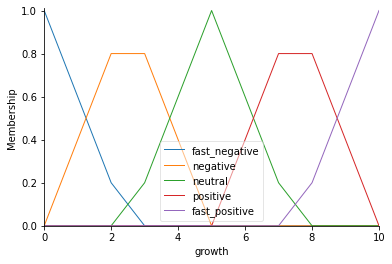

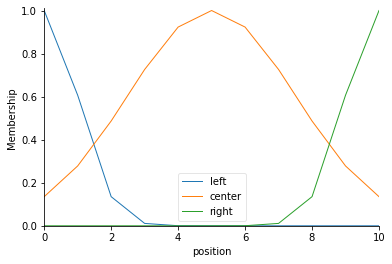

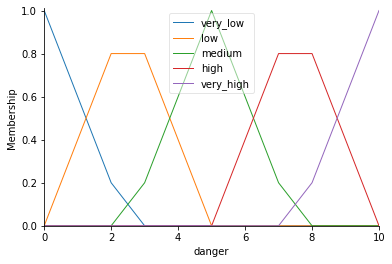

In [56]:
# View memberships.
growth.view()
position.view()
danger.view()

In [57]:
# Rules
rule1 = ctrl.Rule(growth['fast_positive'], danger['very_high'])
rule2 = ctrl.Rule(growth['positive'], danger['high'])
rule3 = ctrl.Rule(growth['neutral'], danger['low'])
rule4 = ctrl.Rule(growth['negative'], danger['very_low'])
rule5 = ctrl.Rule(growth['fast_negative'], danger['very_low'])
rule6 = ctrl.Rule(position['center'], danger['very_high'])
rule7 = ctrl.Rule(position['left'], danger['medium'])
rule8 = ctrl.Rule(position['right'], danger['medium'])

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f380ebc7890>)

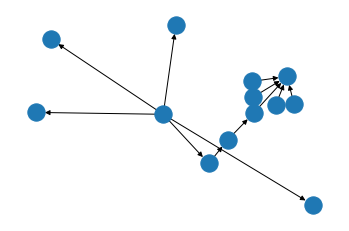

In [58]:
# View rules.
rule1.view()

In [59]:
# Create the control system.
danger_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])
danger_simulation = ctrl.ControlSystemSimulation(danger_ctrl)

In [60]:
# Inputs.
danger_simulation.input['growth'] = 10
danger_simulation.input['position'] = 5

# Compute the output.
danger_simulation.compute()

9.102495598137384


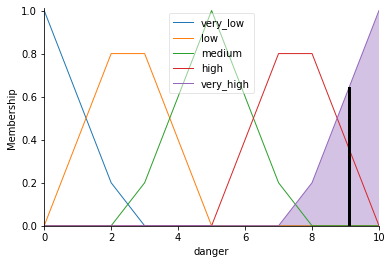

In [63]:
# Show results.
print(danger_simulation.output['danger'])
danger.view(sim=danger_simulation)